#Dimensionality Reduction on Image dataset
Dimensionanlity reduction on sign language dataset.
Shape of our data is (2062,64,64).
2062 is number of images.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import decomposition
from sklearn.linear_model import RidgeCV
import warnings
warnings.filterwarnings('ignore')

['var', 'usr', 'proc', 'dev', 'srv', 'bin', 'run', 'tmp', 'media', 'boot', 'lib64', 'home', 'mnt', 'opt', 'sbin', 'lib', 'etc', 'root', 'sys', '.dockerenv', 'datalab', 'tools', 'tensorflow-1.15.2', 'content', 'lib32', 'python-apt']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Path = 'drive/My Drive/CMPE255/dataset/'

Load the data set

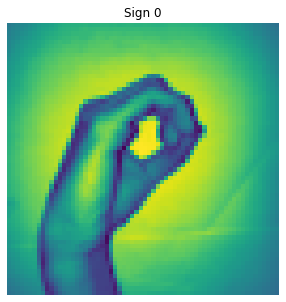

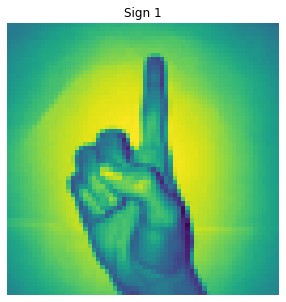

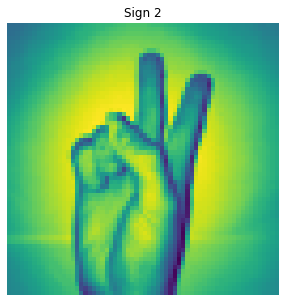

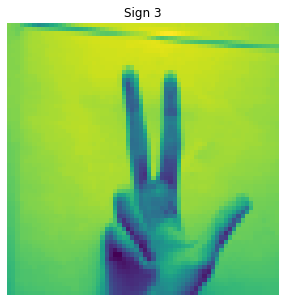

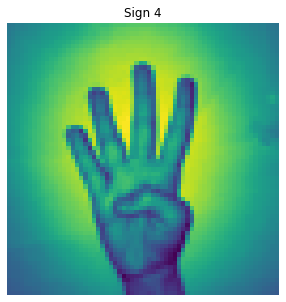

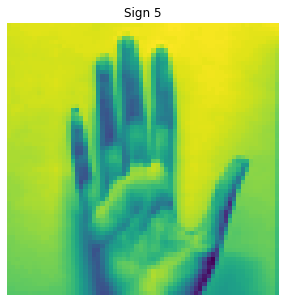

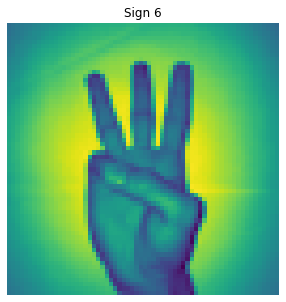

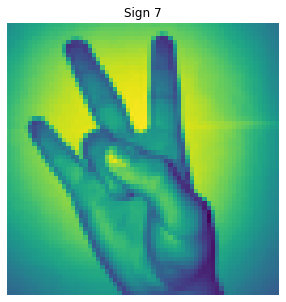

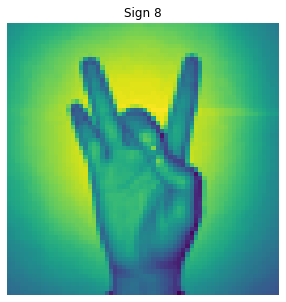

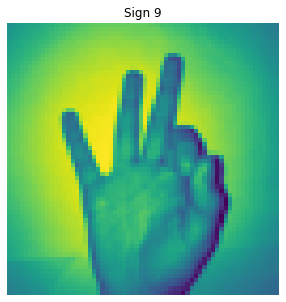

In [ ]:
  # load data set
x_load = np.load(Path+'X.npy')
y_load = np.load(Path+'Y.npy')
img_size = 64

# one sample from each digits
image_index_list = [260,900,1800,1600,1400,2061,700,500,1111,100]
for each in range(10):
    plt.figure(figsize=(8,5))
    plt.imshow(x_load[image_index_list[each]].reshape(img_size, img_size))
    plt.axis('off')
    title = "Sign " + str(each) 
    plt.title(title)
plt.show()

As a training set we will use all images.
As a test set we will choose ten images and use them.

In [ ]:
X = x_load.reshape((len(x_load), -1)) 
train = X
test = X[image_index_list]
n_pixels = X.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
X_test = test[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
y_test = test[:, n_pixels // 2:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2062, 2048)
(2062, 2048)
(10, 2048)
(10, 2048)


In [ ]:
# Fit estimators
estimator = RidgeCV()
start = time.time()   # returns in second
estimator.fit(X_train, y_train)
end = time.time()
print("Training time is "+ str(end - start) + " second.")
start = time.time()   # returns in second
y_test_predict = estimator.predict(X_test)
end = time.time()
print("Prediction time is "+ str(end - start) + " second.")

Training time is 8.39673924446106 second.
Prediction time is 0.014592170715332031 second.


In [ ]:
# Plot the completed images
image_shape = (64, 64)
n_faces = 10
n_cols = 1

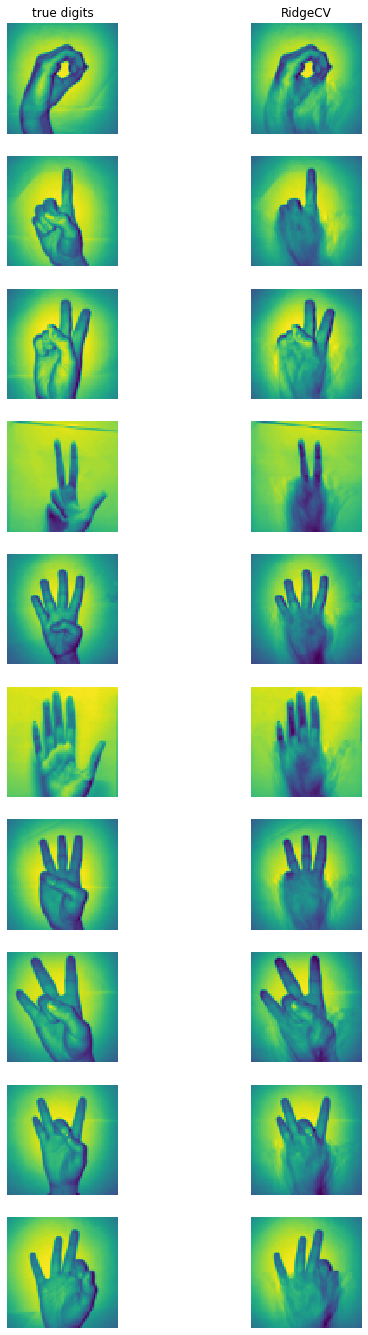

In [ ]:
# Plot the completed images
image_shape = (64, 64)
plt.figure(figsize=(8, 24))
for i in range(10):
    true_digits = np.hstack((X_test[i], y_test[i]))
    if i:
        sub = plt.subplot(10, 2, i * 2 + 1)
    else:
        sub = plt.subplot(10, 2, i * 2 + 1, title="true digits")
    
    sub.imshow(true_digits.reshape(image_shape),interpolation="nearest")
    sub.axis("off")
    completed_digits = np.hstack((X_test[i], y_test_predict[i]))

    if i:
        sub = plt.subplot(10, 2, i * 2 + 2 )

    else:
        sub = plt.subplot(10, 2, i * 2 + 2,title="RidgeCV")

    sub.imshow(completed_digits.reshape(image_shape),interpolation="nearest")
    sub.axis("off")

plt.show()

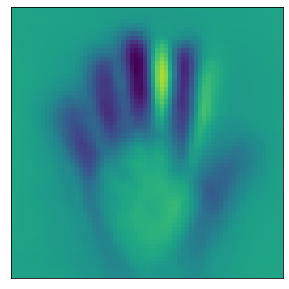

In [ ]:
n_components = 5
(n_samples, n_features) = X.shape
estimator = decomposition.PCA(n_components=n_components, svd_solver='randomized', whiten=True)
estimator.fit(X)
components_ = estimator.components_
images = components_[:n_components]
plt.figure(figsize=(6, 5))
for i, comp in enumerate(images):
    vmax = max(comp.max(), -comp.min())
    plt.imshow(comp.reshape((64, 64)),interpolation='nearest',vmin=-vmax, vmax=vmax)
    plt.xticks(())
    plt.yticks(())
plt.savefig('graph.png')
plt.show()

#t-sne implementation for the same dataset

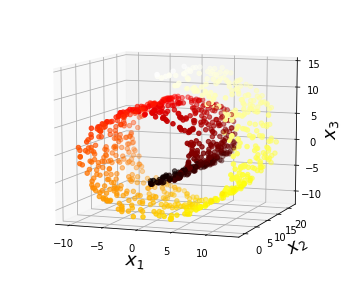

In [ ]:
from sklearn.datasets import make_swiss_roll

X, y = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_reduced = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.027s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.963165
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.445236
[t-SNE] KL divergence after 300 iterations: 0.598495


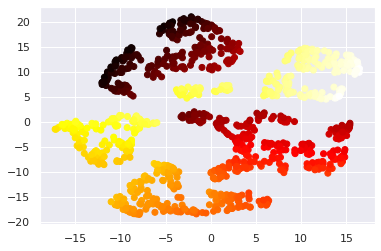

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)

# LLE for the same dataset

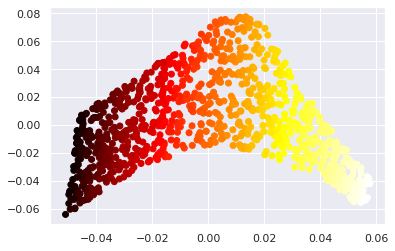

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)
X_reduced.shape

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)

#Isomap implementation on the image dataset

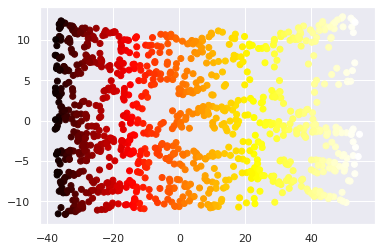

In [ ]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2, n_neighbors=10)
X_reduced = isomap.fit_transform(X)
X_reduced.shape

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)

#SVD implementation on the image dataset

In [ ]:
from sklearn.decomposition import TruncatedSVD
# define transform
svd = TruncatedSVD()
# prepare transform on dataset
svd.fit(X)
# apply transform to dataset
transformed = svd.transform(X)

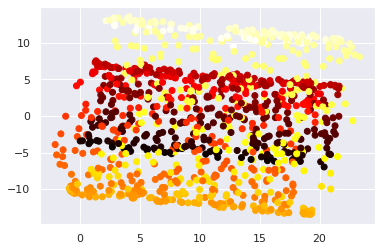

In [ ]:
plt.scatter(transformed[:, 0], transformed[:, 1], c=y, cmap=plt.cm.hot)

#UMAP implementation on the image dataset

In [ ]:
pip install umap-learn

     |████████████████████████████████| 80 kB 7.9 MB/s 
     |████████████████████████████████| 1.1 MB 21.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=c2724bfcdde40b7617361c80bede016bc40a11e0630f4380f6f1bc30ede54080
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=6e41b4afee847298d57685c68dfed0281adf79d00afeca1e89cf51dee32b8f5d
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
import umap.umap_ as umap
embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

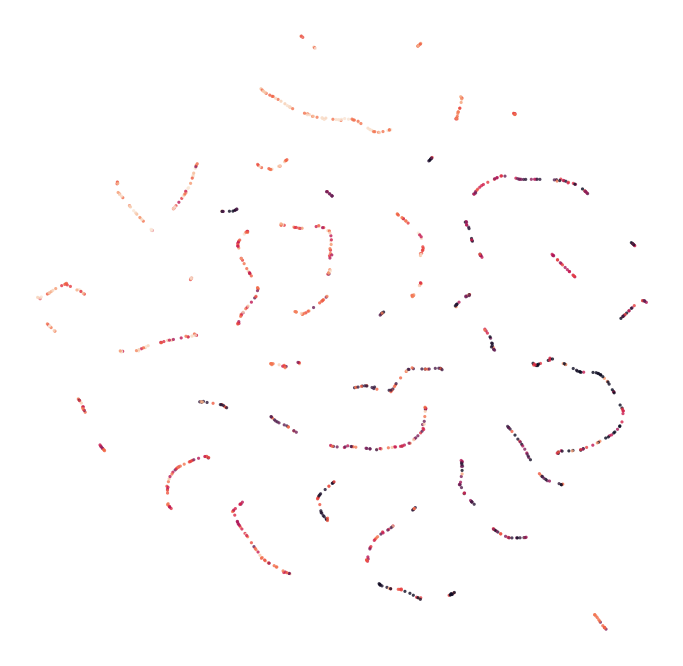

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(embedding[:20000, 0], embedding[:20000, 1], 
            c=X[:20000, 0], 
            edgecolor='none', 
            alpha=0.80, 
            s=10)
plt.axis('off');